# 어떤  게임을 만들어야 할 것인가?
# 보유 자료 : 이름, 플랫폼, 연도, 장르, 유통사, 지역별 판매에 대한 기록

# 파일을 불러오고 기본적인 전처리를 수행함.

In [1]:
#파일 로드
import pandas as pd
import numpy as np
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')

#기본 전처리
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()#평균값 등으로 나타내기 부적절하다 생각해 drop처리
df=df.reset_index(drop=True)

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


# raw data를 보니, 각 feature별로 다양한 오류가 발견됨.
# 이를 위해 추가 전처리를 실시함.

In [2]:
#Platform : Platform 이름이 아닌 2007, 2010, 2600 삭제
df = df[~(df['Platform'] == '2007') & ~(df['Platform'] == '2010') & ~(df['Platform'] == '2600')] 

#Year : 1980년 이전 및 년도가 아닌 data 삭제
df = df[(df['Year'] >= 1980)]
df['Year'] = df['Year'].astype('int')
df['Year'] = df['Year'].astype('str')

#인덱스 정리
df=df.reset_index(drop=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
#각종 sales : k/m을 삭제하고 각각 1000, 백만을 곱하고 float으로 변경
#코치님이 알려준 방식 활용. 8시간 정도 만들다가 실패해 우선 해둔 기존 버전(느리고, 무겁고, 번거로움)은 하단 셀에 있음
df.NA_Sales = (df.NA_Sales.replace(r'[KM]+$', '', regex=True).astype(float) *\
          df.NA_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(int))
df.EU_Sales = (df.EU_Sales.replace(r'[KM]+$', '', regex=True).astype(float) *\
          df.EU_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(int))
df.JP_Sales = (df.JP_Sales.replace(r'[KM]+$', '', regex=True).astype(float) *\
          df.JP_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(int))
df.Other_Sales = (df.Other_Sales.replace(r'[KM]+$', '', regex=True).astype(float) *\
          df.Other_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(int))

In [4]:
#기존에 했던 버전

#k를 제거 후 000을 붙임
# df['NA_Sales'] = df['NA_Sales'].replace('K', '000', regex=True)
# df['EU_Sales'] = df['EU_Sales'].replace('K', '000', regex=True)
# df['JP_Sales'] = df['JP_Sales'].replace('K', '000', regex=True)
# df['Other_Sales'] = df['Other_Sales'].replace('K', '000', regex=True)
#M이 있다면 M을 제거하고 플롯으로 만들고 백만을 곱함
# for i in range(len(df['NA_Sales'])):
#   if 'M' in df['NA_Sales'][i]:
#     df['NA_Sales'][i] = df['NA_Sales'][i].replace("M", '')
#     df['NA_Sales'][i] = float(df['NA_Sales'][i])
#     df['NA_Sales'][i] = 1000000 * df['NA_Sales'][i]

# for i in range(len(df['EU_Sales'])):
#   if 'M' in df['EU_Sales'][i]:
#     df['EU_Sales'][i] = df['EU_Sales'][i].replace("M", '')
#     df['EU_Sales'][i] = float(df['EU_Sales'][i])
#     df['EU_Sales'][i] = 1000000 * df['EU_Sales'][i]

# for i in range(len(df['JP_Sales'])):
#   if 'M' in df['JP_Sales'][i]:
#     df['JP_Sales'][i] = df['JP_Sales'][i].replace("M", '')
#     df['JP_Sales'][i] = float(df['JP_Sales'][i])
#     df['JP_Sales'][i] = 1000000 * df['JP_Sales'][i]

# for i in range(len(df['Other_Sales'])):
#   if 'M' in df['Other_Sales'][i]:
#     df['Other_Sales'][i] = df['Other_Sales'][i].replace("M", '')
#     df['Other_Sales'][i] = float(df['Other_Sales'][i])
#     df['Other_Sales'][i] = 1000000 * df['Other_Sales'][i]

In [5]:
#sales를 float으로 변경
df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16026 entries, 0 to 16025
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16026 non-null  object 
 1   Platform     16026 non-null  object 
 2   Year         16026 non-null  object 
 3   Genre        16026 non-null  object 
 4   Publisher    16026 non-null  object 
 5   NA_Sales     16026 non-null  float64
 6   EU_Sales     16026 non-null  float64
 7   JP_Sales     16026 non-null  float64
 8   Other_Sales  16026 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.1+ MB


# 더 나은 insight를 얻기 위해 feature를 추가함.

In [6]:
#Totoal Sales = 지역 Sales의 합
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


# 범주형 - 수치형
# 여러 시각화 및 이를 통한 해석 시도. 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#전반적인 수학적 정보들 확인

In [8]:
df.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,1.602600e+04,1.602600e+04,1.602600e+04,16026.000000,1.602600e+04
mean,4.572827e+03,2.135426e+03,1.245553e+03,463.669670,8.417476e+03
std,1.231249e+05,5.337947e+04,4.544963e+04,10315.021166,1.421344e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,6.000000e-02
50%,8.000000e-02,2.000000e-02,0.000000e+00,0.010000,1.800000e-01
75%,2.400000e-01,1.200000e-01,4.000000e-02,0.040000,5.200000e-01
max,9.630000e+06,2.930000e+06,3.150000e+06,590000.000000,9.630007e+06


#연도와  총 게임 판매량의 관계

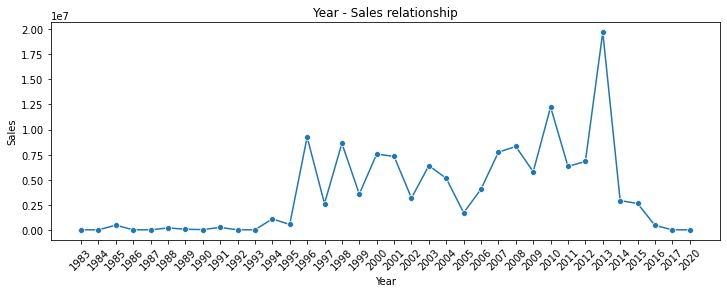

In [9]:
#df를 년도로 묶고, 합을 구함
df_groupby_year = df.groupby('Year').sum()
plt.figure(figsize=(12, 4))
plt.xticks(rotation = 45)
sns.lineplot(data=df_groupby_year, x='Year', y='Total_Sales', marker='o');
plt.ylabel('Sales')
plt.title('Year - Sales relationship')
plt.show()

#연도와 총 게임 판매량 : 큰 연관이 없다

#연도와 타이틀별 평균 판매량의 관계 

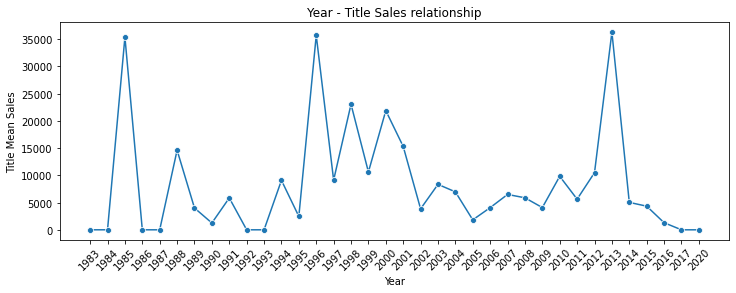

In [10]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_groupby_year, x='Year', y = (df_groupby_year['Total_Sales'] / df.groupby('Year').size()), marker='o');
plt.ylabel('Title Mean Sales')
plt.xticks(rotation = 45)
plt.title('Year - Title Sales relationship')
plt.show()

#연도와 타이틀별 평균 판매량은 큰 연관이 없다

#연도와 장르의 관계

In [11]:
import plotly.express as px
#df를 장르와 연도 기준으로 묶고 합을 구함
df_groupby_yg = df.groupby(['Genre','Year']).sum().reset_index()
df_groupby_yg['Total_Sales'] = df_groupby_yg['Total_Sales'].fillna(0)
px.bar(df_groupby_yg, x = 'Genre',y = 'Total_Sales',animation_frame='Year')

#연도별로 선호되는 장르가 있다

#장르와 총 게임 판매량의 관계

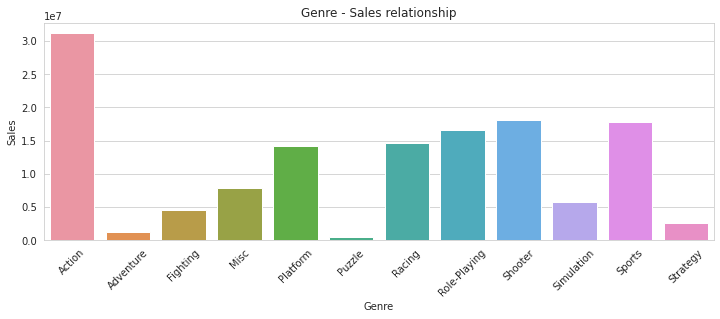

In [12]:
#df를 장르로 묶고 합을 구함
df_groupby_genre = df.groupby('Genre').sum().reset_index()

plt.figure(figsize=(12, 4))
sns.set_style('whitegrid')
sns.barplot(data=df_groupby_genre, x='Genre', y='Total_Sales');
plt.title('Genre - Sales relationship')
plt.xticks(rotation = 45)
plt.ylabel('Sales')
plt.show()

#장르에 따른 총 게임 판매량 : Action, Shooter, Sports,Role-Playing, Racing 순

#장르와 타이틀별 평균 판매량의 관계

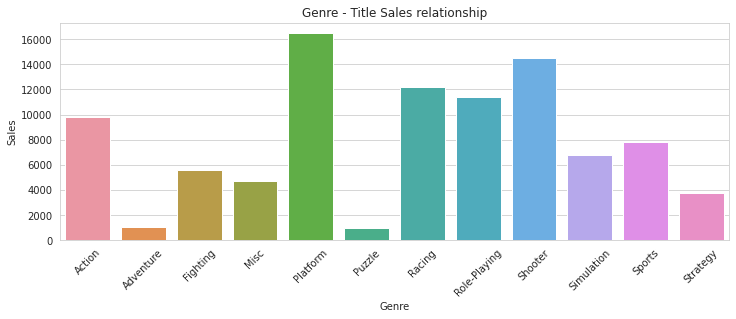

In [13]:
plt.figure(figsize=(12, 4))
sns.set_style('whitegrid')
sns.barplot(x = df_groupby_genre['Genre'], y=df_groupby_genre['Total_Sales'].values/df.groupby('Genre').size().values);
plt.title('Genre - Title Sales relationship')
plt.ylabel('Sales')
plt.xticks(rotation = 45)
plt.show()

#타이틀별 평균 판매량 : Platform, Shooter, Racing, Role-Playing, Action 순

#장르와 출시량의 관계

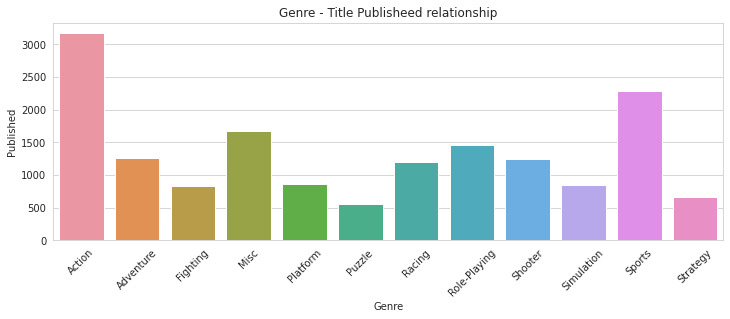

In [14]:
plt.figure(figsize=(12, 4))
sns.set_style('whitegrid')
sns.barplot(data=df_groupby_genre, x='Genre', y=df.groupby('Genre').size().values);
plt.title('Genre - Title Publisheed relationship')
plt.ylabel('Published')
plt.xticks(rotation = 45)
plt.show()

#장르에 따른 출시량 : Action, Sports, Misc, Role-Playing, Adventure 순

#장르와 지역별 판매량의 관계

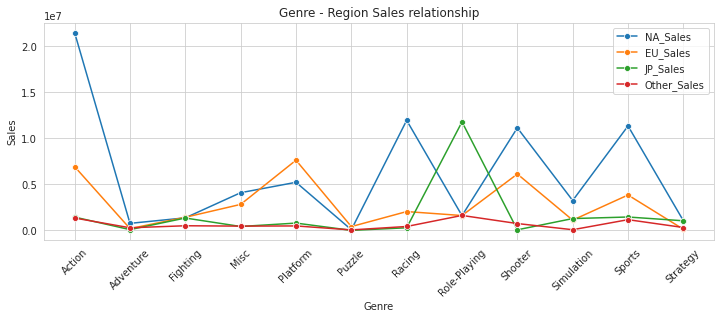

In [15]:
plt.figure(figsize=(12, 4))
sns.set_style('whitegrid')
sns.lineplot(data=df_groupby_genre, x='Genre', y='NA_Sales', marker='o');
sns.lineplot(data=df_groupby_genre, x='Genre', y='EU_Sales', marker='o');
sns.lineplot(data=df_groupby_genre, x='Genre', y='JP_Sales', marker='o');
sns.lineplot(data=df_groupby_genre, x='Genre', y='Other_Sales', marker='o');
plt.legend(labels=['NA_Sales', 'EU_Sales',	'JP_Sales',	'Other_Sales'])
plt.title('Genre - Region Sales relationship')
plt.xticks(rotation = 45)
plt.ylabel('Sales')
plt.show()

#NA : Action, Racing, Sports, Shooter, Platform 순 판매
#EU : Platform, Action, Shooter, Sports, Misc 순 판매
#JP : Role-Playing, Sports, Action, Fighting, Simulation 순 판매
#기타 : Role-Playing, Action, Sports, Shooter, Fighting 순 판매

#지역&장르별 타이틀별 판매량의 관계

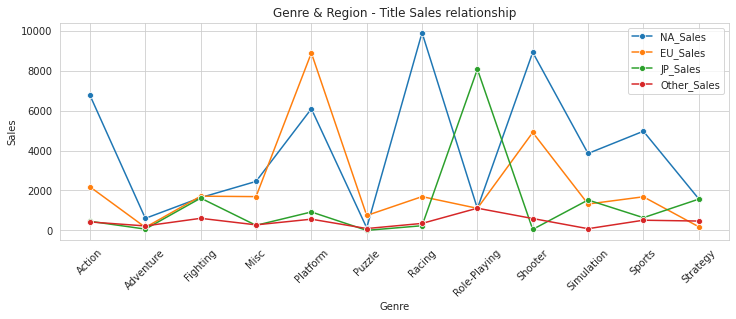

In [16]:
plt.figure(figsize=(12, 4))
sns.set_style('whitegrid')
sns.lineplot(data=df_groupby_genre, x='Genre', y=(df_groupby_genre['NA_Sales'].values / df.groupby('Genre').size().values), marker='o');
sns.lineplot(data=df_groupby_genre, x='Genre', y=(df_groupby_genre['EU_Sales'].values / df.groupby('Genre').size().values), marker='o');
sns.lineplot(data=df_groupby_genre, x='Genre', y=(df_groupby_genre['JP_Sales'].values / df.groupby('Genre').size().values), marker='o');
sns.lineplot(data=df_groupby_genre, x='Genre', y=(df_groupby_genre['Other_Sales'].values / df.groupby('Genre').size().values), marker='o');
plt.legend(labels=['NA_Sales', 'EU_Sales',	'JP_Sales',	'Other_Sales'])
plt.title('Genre & Region - Title Sales relationship')
plt.ylabel('Sales')
plt.xticks(rotation = 45)
plt.show()

#NA : Racing, Shooter, Action, Platform, Sports 순
#EU : Platform, Shooter, Action, Fighting, Racing 순
#JP : Role-Playing, Fighting, Strategy, Simulation, Platform 순
#Other : Role-Playing, Fighting, Shooter, Platform, Sports 순

#지역별 판매의 비중 차이

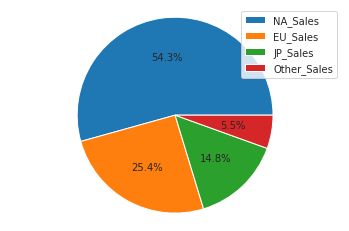

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
NA_Sales,1.000000,0.001873,-0.001017,0.006046,0.867074
EU_Sales,0.001873,1.000000,-0.001080,-0.001796,0.376703
JP_Sales,-0.001017,-0.001080,1.000000,-0.000379,0.318451
Other_Sales,0.006046,-0.001796,-0.000379,1.000000,0.077014
Total_Sales,0.867074,0.376703,0.318451,0.077014,1.000000


In [17]:
region_sale = [df['NA_Sales'].sum(), df['EU_Sales'].sum(), df['JP_Sales'].sum(), df['Other_Sales'].sum()]

plt.pie(region_sale, autopct='%0.1f%%')
categories = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
plt.legend(categories)
plt.axis('equal')
plt.show()

df.corr()

#미국 판매가 제일 크다 = 가장 총판매와 비슷하다

#플랫폼 및 판매량의 관계

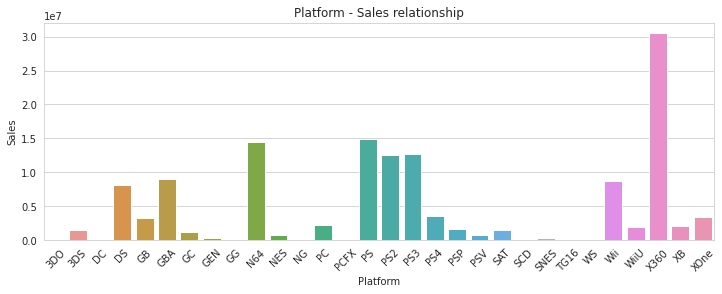

In [18]:
#df를 플랫폼으로 묶어 합을 구함
df_groupby_platform = df.groupby('Platform').sum().reset_index()
plt.figure(figsize=(12, 4))
sns.set_style('whitegrid')

sns.barplot(data=df_groupby_platform, x='Platform', y='Total_Sales');
plt.title('Platform - Sales relationship')
plt.ylabel('Sales')
plt.xticks(rotation = 45)
plt.show()

#플랫폼 및 판매량 :  xbox360, ps, n64, ps3, ps2 순

#플랫폼 및 타이틀별 평균 판매량

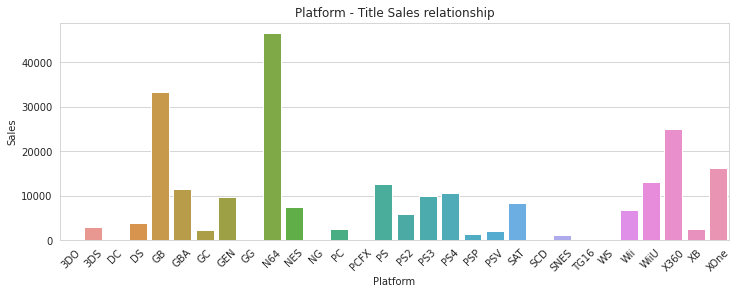

In [19]:
plt.figure(figsize=(12, 4))
sns.set_style('whitegrid')
sns.barplot(data=df_groupby_platform, x='Platform', y=df_groupby_platform['Total_Sales'].values/df.groupby('Platform').size().values);
plt.title('Platform - Title Sales relationship')
plt.ylabel('Sales')
plt.xticks(rotation = 45)
plt.show()

#플랫폼 및 타이틀별 평균 판매량 :  n64, GB, X360, XOne,WiiU 순

#플랫폼군별 판매량의 관계

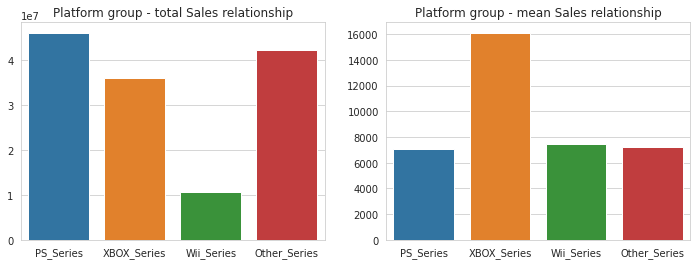

In [20]:
#플롯품군별을 만들기 위해 유사한 것끼리 데이터를 필터링해 하나로 묶음
PS_Series = pd.concat([df[df['Platform']=='PS'], df[df['Platform']=='PS2'], df[df['Platform']=='PS3'], df[df['Platform']=='PS4'], df[df['Platform']=='PSP'], df[df['Platform']=='PSV']])
XBOX_Series = pd.concat([df[df['Platform']=='X360'], df[df['Platform']=='XB'], df[df['Platform']=='XOne']])
Wii_Series = pd.concat([df[df['Platform']=='Wii'], df[df['Platform']=='WiiU']])
Other_Series = pd.concat([df, PS_Series, XBOX_Series, Wii_Series]).drop_duplicates(keep=False)
Platform_list = ['PS_Series', 'XBOX_Series', 'Wii_Series', 'Other_Series']
Platform_list_sum = [PS_Series['Total_Sales'].sum(), XBOX_Series['Total_Sales'].sum(), Wii_Series['Total_Sales'].sum(), Other_Series['Total_Sales'].sum()]
Platform_list_mean = [PS_Series['Total_Sales'].sum()/len(PS_Series), XBOX_Series['Total_Sales'].sum()/len(XBOX_Series), Wii_Series['Total_Sales'].sum()/len(Wii_Series), Other_Series['Total_Sales'].sum()/len(Other_Series)]

plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.barplot(x=Platform_list, y=Platform_list_sum);
plt.title('Platform group - total Sales relationship')

plt.subplot(122)
sns.barplot(x=Platform_list, y=Platform_list_mean);
plt.title('Platform group - mean Sales relationship')
plt.show()


#플랫폼군별 판매량 : PS시리즈, 기타, XBOX시리즈 순
#플랫폼군별 타이틀별 평균 판매량 : XBOX시리즈, Wii시리즈, 기타 순

#유통사별 유통량 차이

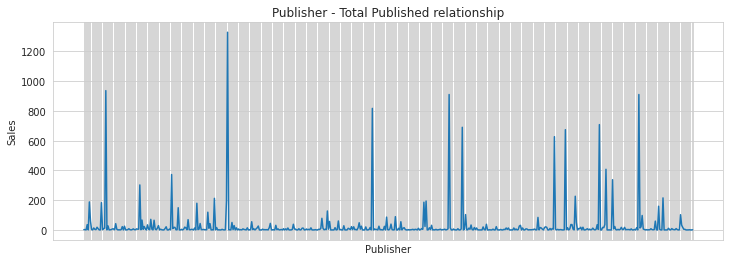

In [21]:
#df를 유통사별로 묶어 크기를 확인함
Publishers_total_publishing = df.groupby('Publisher').size().reset_index(name='Total_Published')

plt.figure(figsize=(12, 4))
sns.lineplot(data=Publishers_total_publishing, x='Publisher', y='Total_Published');
plt.title('Publisher - Total Published relationship')
plt.ylabel('Sales')
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.show()

#유통사별로 유통량 차이가 큼 : 유통사 선택의 중요성

#제일 많이 유통한 유통사 10개

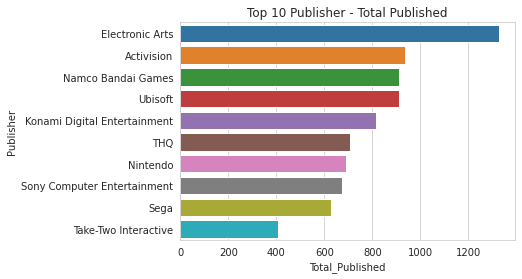

In [22]:
#유통사별로 묶어 크기를 확인한 것을 total published 크기별로 정렬함
Top_10_publisher_published = Publishers_total_publishing.set_index('Publisher').sort_values(by=['Total_Published'], ascending=False).head(10).reset_index()

sns.barplot(data=Top_10_publisher_published, y='Publisher', x='Total_Published')
plt.title('Top 10 Publisher - Total Published')
plt.show()

#유통사별 총판매량

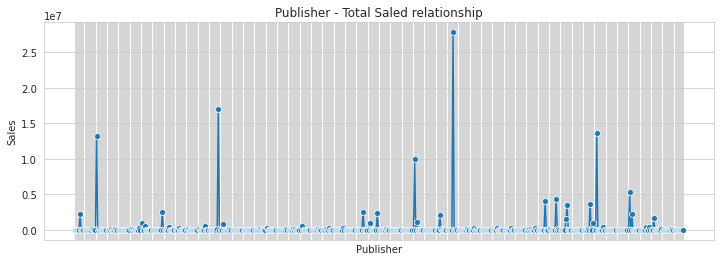

In [23]:
#df의 total sales를 유통사별로 묶어서 합침
Publishers_total_sale = df['Total_Sales'].groupby(df['Publisher']).sum().reset_index(name='Total_saled')

plt.figure(figsize=(12, 4))
sns.lineplot(data=Publishers_total_sale, x='Publisher', y='Total_saled', marker='o');
plt.title('Publisher - Total Saled relationship')
plt.ylabel('Sales')
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.show()

#유통사별 총판매량도 차이가 크다

#총판매량이 제일 많은 유통사 10개

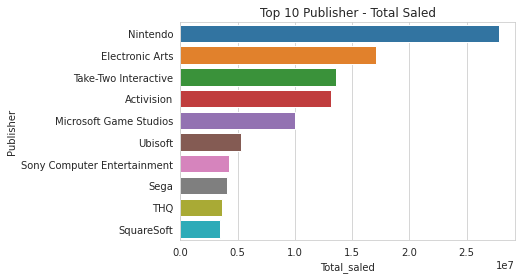

In [24]:
#df의 total sales를 유통사별로 묶어서 합친 걸 정렬함
Top_10_publisher_saled = Publishers_total_sale.set_index('Publisher').sort_values(by=['Total_saled'], ascending=False).head(10).reset_index()

sns.barplot(data=Top_10_publisher_saled, y='Publisher', x='Total_saled')
plt.title('Top 10 Publisher - Total Saled')
plt.show()

#유통사별 1타이틀당 평균 판매량 차이

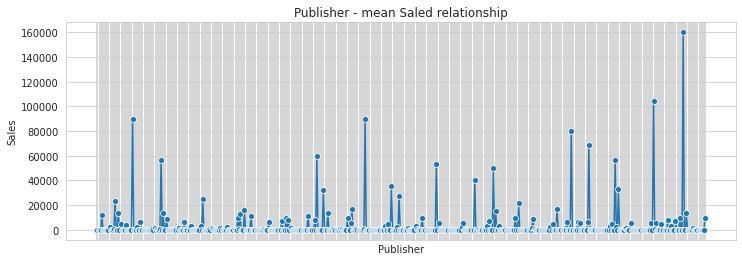

In [25]:
Publisher_calculate = pd.merge(Publishers_total_publishing, Publishers_total_sale, how='inner', on='Publisher')
Publisher_calculate = Publisher_calculate.set_index('Publisher')
Publisher_calculate['Mean_Saled'] = Publisher_calculate['Total_saled'] / Publisher_calculate['Total_Published']

plt.figure(figsize=(12, 4))
sns.lineplot(data=Publisher_calculate, x='Publisher', y='Mean_Saled', marker='o');
plt.title('Publisher - mean Saled relationship')
plt.ylabel('Sales')
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.show()

#유통사별 1타이틀당 판매량도 격차가 크다

#유통사의 타이틀별 평균 판매량 상위 10개

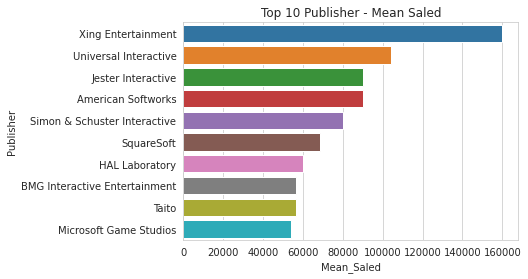

In [26]:
Top_10_publisher_mean_sale = Publisher_calculate.sort_values(by=['Mean_Saled'], ascending=False).head(10).reset_index()

sns.barplot(data=Top_10_publisher_mean_sale, y='Publisher', x='Mean_Saled')
plt.title('Top 10 Publisher - Mean Saled')
plt.show()

#판매량 top 30에 대한 분석

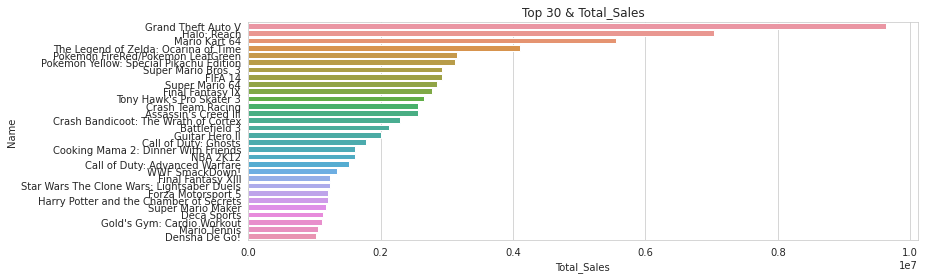

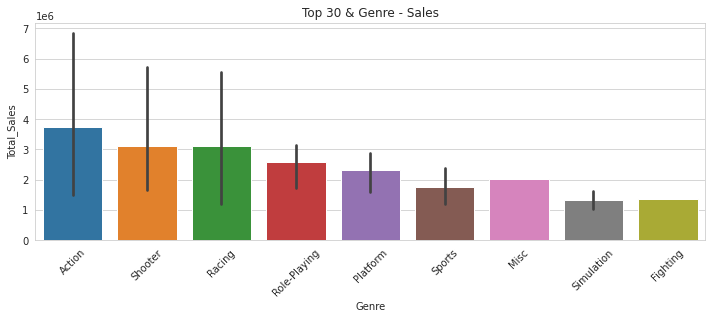

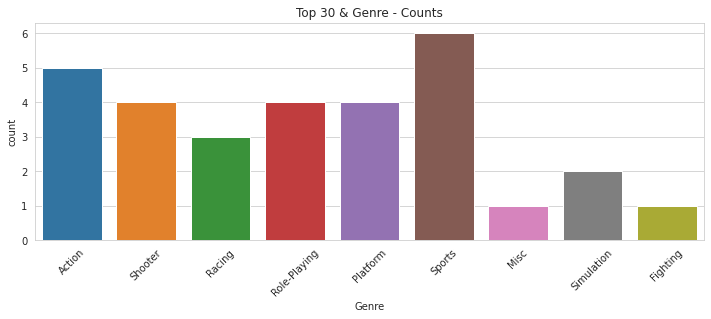

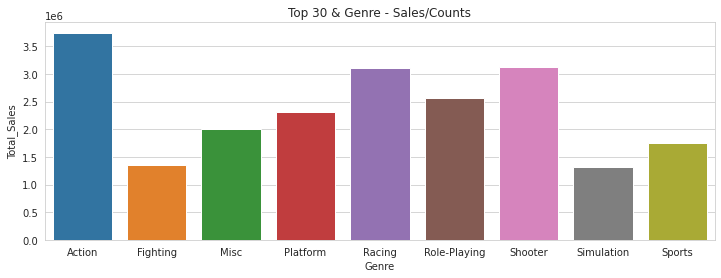

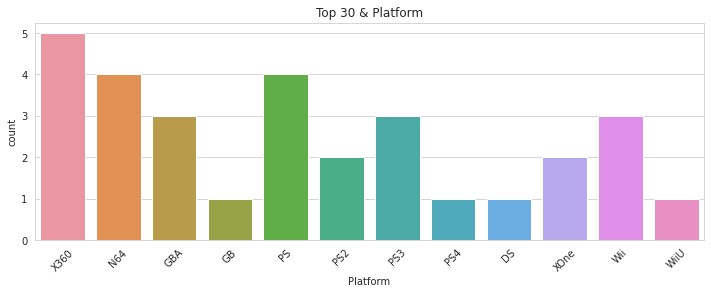

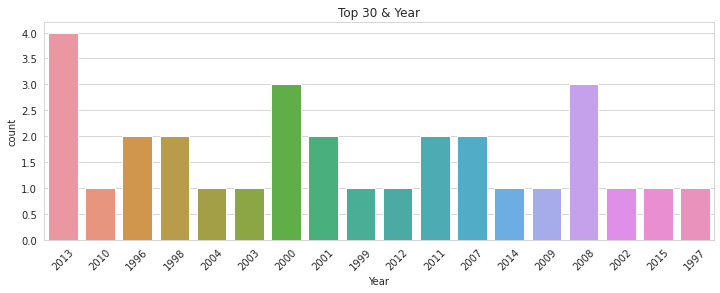

In [27]:
Top_30 = df.sort_values('Total_Sales', ascending = False).head(30)

plt.figure(figsize=(12,4))
plt.title('Top 30 & Total_Sales')
sns.set_style('whitegrid')
sns.barplot(data=Top_30, y='Name', x='Total_Sales');
plt.show()

#GTA5, Halo, Mario Cart 가 총 판매량 Top 3

plt.figure(figsize=(12,4))
plt.title('Top 30 & Genre - Sales')
sns.set_style('whitegrid')
sns.barplot(data=Top_30, x='Genre', y='Total_Sales');
plt.xticks(rotation = 45)
plt.show()

#Top 30의 장르별 판매량은 Action, Racing, Shooter 순이다

plt.figure(figsize=(12,4))
plt.title('Top 30 & Genre - Counts')
sns.set_style('whitegrid')
sns.countplot(data=Top_30, x='Genre');
plt.xticks(rotation = 45)
plt.show()

#Top 30은 Shooter, Action, Platform 장르가 많다

plt.figure(figsize=(12,4))
plt.title('Top 30 & Genre - Sales/Counts')
sns.set_style('whitegrid')
sns.barplot(x=Top_30.groupby('Genre').mean().index, y=Top_30.groupby('Genre').mean()['Total_Sales']);
plt.show()

#Top 30의 장르별 타이틀별 판매량은  Action, Shooter, Racing 장르가 많다

plt.figure(figsize=(12,4))
plt.title('Top 30 & Platform')
sns.set_style('whitegrid')
sns.countplot(data=Top_30, x='Platform');
plt.xticks(rotation = 45)
plt.show()

#Top 30은 XBOX360에서 가장 많이 나왔다

plt.figure(figsize=(12,4))
plt.title('Top 30 & Year')
sns.set_style('whitegrid')
sns.countplot(data=Top_30, x='Year');
plt.xticks(rotation = 45)
plt.show()

#Top 30과 연도는 큰 관련이 없다


# 범주형 - 범주형 데이터간의 분석

In [28]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.stats as stats


#플랫폼과 장르의 카이제곱분석

In [29]:
df_pg = pd.crosstab(df['Platform'], df['Genre'])
df_pg_chi = stats.chi2_contingency(df_pg)
print("1. 카이제곱 통계량:", df_pg_chi[0])
print("2. p-value:", df_pg_chi[1])
print("3. 기대값 행렬:")
pd.DataFrame(df_pg_chi[3], index=df_pg.index, columns=df_pg.columns)

#귀무가설 : 둘은 관계없을 것이다
#대립가설 : 둘은 관계있을 것이다
#pvalue가 0이므로 0.05>pvalue, 대립가설 채택

1. 카이제곱 통계량: 5659.107259521096
2. p-value: 0.0
3. 기대값 행렬:


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DO,0.593598,0.236428,0.154998,0.311868,0.160240,0.102958,0.225571,0.272744,0.233246,0.157244,0.426806,0.124298
3DS,97.745788,38.931861,25.523025,51.354299,26.386123,16.953700,37.144016,44.911893,38.407837,25.892924,70.280794,20.467740
DC,10.289030,4.098091,2.686634,5.405716,2.777487,1.784600,3.909896,4.727568,4.042930,2.725571,7.397978,2.154499
DS,417.695058,166.366717,109.067016,219.451267,112.755273,72.447897,158.726757,191.921066,164.127418,110.647697,300.329465,87.464370
GB,18.995133,7.565706,4.959940,9.979783,5.127668,3.294646,7.218270,8.727817,7.463871,5.031823,13.657806,3.977537
GBA,154.335455,61.471359,40.299513,81.085736,41.662299,26.769000,58.648446,70.913516,60.643954,40.883564,110.969674,32.317484
GC,106.451891,42.399476,27.796331,55.928366,28.736304,18.463746,40.452390,48.912143,41.828778,28.199176,76.540621,22.290777
GEN,5.342381,2.127855,1.394983,2.806814,1.442156,0.926619,2.030139,2.454699,2.099214,1.415200,3.841258,1.118682
GG,0.197866,0.078809,0.051666,0.103956,0.053413,0.034319,0.075190,0.090915,0.077749,0.052415,0.142269,0.041433


#플랫폼과 유통사의 카이제곱분석

In [34]:
df_pp = pd.crosstab(df['Platform'], df['Publisher'])
df_pp_chi = stats.chi2_contingency(df_pp)
print("1. 카이제곱 통계량:", df_pp_chi[0])
print("2. p-value:", df_pp_chi[1])
print("3. 기대값 행렬:")
pd.DataFrame(df_pp_chi[3], index=df_pp.index, columns=df_pp.columns)

#귀무가설 : 둘은 관계없을 것이다
#대립가설 : 둘은 관계있을 것이다
#pvalue가 0이므로 0.05>pvalue, 대립가설 채택

1. 카이제곱 통계량: 65365.01027629475
2. p-value: 0.0
3. 기대값 행렬:


Publisher,10TACLE Studios,1C Company,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,989 Studios,AQ Interactive,ASC Games,ASCII Entertainment,ASCII Media Works,ASK,Abylight,Acclaim Entertainment,Accolade,Ackkstudios,Acquire,Activision,Activision Blizzard,Activision Value,Adeline Software,Aerosoft,Agatsuma Entertainment,Agetec,Aksys Games,Alawar Entertainment,Alchemist,Alternative Software,Altron,Alvion,American Softworks,Angel Studios,Aqua Plus,Aques,Arc System Works,Arena Entertainment,Aria,...,Vic Tokai,Victor Interactive,Video System,Views,Vir2L Studios,Virgin Interactive,Virtual Play Games,Visco,Vivendi Games,Wanadoo,Warashi,Wargaming.net,Warner Bros. Interactive Entertainment,Warp,WayForward Technologies,Westwood Studios,White Park Bay Software,XS Games,Xicat Interactive,Xing Entertainment,Xplosiv,Xseed Games,Yacht Club Games,Yamasa Entertainment,Yeti,Yuke's,Yumedia,Zenrin,Zoo Digital Publishing,Zoo Games,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
Platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3DO,0.000562,0.000562,0.000187,0.006739,0.000187,0.035380,0.011419,0.000749,0.000187,0.002621,0.000936,0.000562,0.003557,0.001685,0.000187,0.000187,0.034444,0.000562,0.001872,0.002434,0.175215,0.000187,0.005241,0.000187,0.000374,0.000562,0.001498,0.001498,0.000374,0.008049,0.001123,0.000187,0.000374,0.000187,0.000562,0.004306,0.000187,0.004867,0.000374,0.000187,...,0.000374,0.001685,0.000562,0.000374,0.000562,0.011232,0.000374,0.000187,0.029951,0.000936,0.000187,0.000187,0.040434,0.000187,0.000187,0.000187,0.000187,0.002246,0.000562,0.000187,0.001872,0.000749,0.000562,0.000374,0.001872,0.000562,0.000187,0.000374,0.019281,0.006177,0.003370,0.000936,0.000936,0.000187,0.000187,0.000187,0.000374,0.000187,0.000187,0.000374
3DS,0.092475,0.092475,0.030825,1.109697,0.030825,5.825908,1.880319,0.123300,0.030825,0.431549,0.154125,0.092475,0.585673,0.277424,0.030825,0.030825,5.671783,0.092475,0.308249,0.400724,28.852115,0.030825,0.863097,0.030825,0.061650,0.092475,0.246599,0.246599,0.061650,1.325471,0.184949,0.030825,0.061650,0.030825,0.092475,0.708973,0.030825,0.801448,0.061650,0.030825,...,0.061650,0.277424,0.092475,0.061650,0.092475,1.849495,0.061650,0.030825,4.931986,0.154125,0.030825,0.030825,6.658180,0.030825,0.030825,0.030825,0.030825,0.369899,0.092475,0.030825,0.308249,0.123300,0.092475,0.061650,0.308249,0.092475,0.030825,0.061650,3.174966,1.017222,0.554848,0.154125,0.154125,0.030825,0.030825,0.030825,0.061650,0.030825,0.030825,0.061650
DC,0.009734,0.009734,0.003245,0.116810,0.003245,0.613253,0.197928,0.012979,0.003245,0.045426,0.016224,0.009734,0.061650,0.029203,0.003245,0.003245,0.597030,0.009734,0.032447,0.042181,3.037065,0.003245,0.090852,0.003245,0.006489,0.009734,0.025958,0.025958,0.006489,0.139523,0.019468,0.003245,0.006489,0.003245,0.009734,0.074629,0.003245,0.084363,0.006489,0.003245,...,0.006489,0.029203,0.009734,0.006489,0.009734,0.194684,0.006489,0.003245,0.519156,0.016224,0.003245,0.003245,0.700861,0.003245,0.003245,0.003245,0.003245,0.038937,0.009734,0.003245,0.032447,0.012979,0.009734,0.006489,0.032447,0.009734,0.003245,0.006489,0.334207,0.107076,0.058405,0.016224,0.016224,0.003245,0.003245,0.003245,0.006489,0.003245,0.003245,0.006489
DS,0.395170,0.395170,0.131723,4.742044,0.131723,24.895732,8.035130,0.526894,0.131723,1.844128,0.658617,0.395170,2.502746,1.185511,0.131723,0.131723,24.237115,0.395170,1.317234,1.712405,123.293149,0.131723,3.688257,0.131723,0.263447,0.395170,1.053788,1.053788,0.263447,5.664108,0.790341,0.131723,0.263447,0.131723,0.395170,3.029639,0.131723,3.424810,0.263447,0.131723,...,0.263447,1.185511,0.395170,0.263447,0.395170,7.903407,0.263447,0.131723,21.075752,0.658617,0.131723,0.131723,28.452265,0.131723,0.131723,0.131723,0.131723,1.580681,0.395170,0.131723,1.317234,0.526894,0.395170,0.263447,1.317234,0.395170,0.131723,0.263447,13.567515,4.346874,2.371022,0.658617,0.6

#장르와 유통사의 카이제곱분석

In [31]:
df_gp = pd.crosstab(df['Genre'], df['Publisher'])
df_gp_chi = stats.chi2_contingency(df_gp)
print("1. 카이제곱 통계량:", df_gp_chi[0])
print("2. p-value:", df_gp_chi[1])
print("3. 기대값 행렬:")
pd.DataFrame(df_gp_chi[3], index=df_gp.index, columns=df_gp.columns)

#귀무가설 : 둘은 관계없을 것이다
#대립가설 : 둘은 관계있을 것이다
#pvalue가 0이므로 0.05>pvalue, 대립가설 채택

1. 카이제곱 통계량: 24811.483089833502
2. p-value: 0.0
3. 기대값 행렬:


Publisher,10TACLE Studios,1C Company,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,989 Studios,AQ Interactive,ASC Games,ASCII Entertainment,ASCII Media Works,ASK,Abylight,Acclaim Entertainment,Accolade,Ackkstudios,Acquire,Activision,Activision Blizzard,Activision Value,Adeline Software,Aerosoft,Agatsuma Entertainment,Agetec,Aksys Games,Alawar Entertainment,Alchemist,Alternative Software,Altron,Alvion,American Softworks,Angel Studios,Aqua Plus,Aques,Arc System Works,Arena Entertainment,Aria,...,Vic Tokai,Victor Interactive,Video System,Views,Vir2L Studios,Virgin Interactive,Virtual Play Games,Visco,Vivendi Games,Wanadoo,Warashi,Wargaming.net,Warner Bros. Interactive Entertainment,Warp,WayForward Technologies,Westwood Studios,White Park Bay Software,XS Games,Xicat Interactive,Xing Entertainment,Xplosiv,Xseed Games,Yacht Club Games,Yamasa Entertainment,Yeti,Yuke's,Yumedia,Zenrin,Zoo Digital Publishing,Zoo Games,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,0.593598,0.593598,0.197866,7.123175,0.197866,37.396668,12.069824,0.791464,0.197866,2.770124,0.989330,0.593598,3.759453,1.780794,0.197866,0.197866,36.407338,0.593598,1.978660,2.572258,185.202546,0.197866,5.540247,0.197866,0.395732,0.593598,1.582928,1.582928,0.395732,8.508237,1.187196,0.197866,0.395732,0.197866,0.593598,4.550917,0.197866,5.144515,0.395732,0.197866,...,0.395732,1.780794,0.593598,0.395732,0.593598,11.871958,0.395732,0.197866,31.658555,0.989330,0.197866,0.197866,42.739049,0.197866,0.197866,0.197866,0.197866,2.374392,0.593598,0.197866,1.978660,0.791464,0.593598,0.395732,1.978660,0.593598,0.197866,0.395732,20.380195,6.529577,3.561587,0.989330,0.989330,0.197866,0.197866,0.197866,0.395732,0.197866,0.197866,0.395732
Adventure,0.236428,0.236428,0.078809,2.837140,0.078809,14.894983,4.807376,0.315238,0.078809,1.103332,0.394047,0.236428,1.497379,0.709285,0.078809,0.078809,14.500936,0.236428,0.788094,1.024523,73.765631,0.078809,2.206664,0.078809,0.157619,0.236428,0.630475,0.630475,0.157619,3.388806,0.472857,0.078809,0.157619,0.078809,0.236428,1.812617,0.078809,2.049045,0.157619,0.078809,...,0.157619,0.709285,0.236428,0.157619,0.236428,4.728566,0.157619,0.078809,12.609510,0.394047,0.078809,0.078809,17.022838,0.078809,0.078809,0.078809,0.078809,0.945713,0.236428,0.078809,0.788094,0.315238,0.236428,0.157619,0.788094,0.236428,0.078809,0.157619,8.117372,2.600711,1.418570,0.394047,0.394047,0.078809,0.078809,0.078809,0.157619,0.078809,0.078809,0.157619
Fighting,0.154998,0.154998,0.051666,1.859978,0.051666,9.764882,3.151629,0.206664,0.051666,0.723325,0.258330,0.154998,0.981655,0.464994,0.051666,0.051666,9.506552,0.154998,0.516660,0.671659,48.359416,0.051666,1.446649,0.051666,0.103332,0.154998,0.413328,0.413328,0.103332,2.221640,0.309996,0.051666,0.103332,0.051666,0.154998,1.188319,0.051666,1.343317,0.103332,0.051666,...,0.103332,0.464994,0.154998,0.103332,0.154998,3.099963,0.103332,0.051666,8.266567,0.258330,0.051666,0.051666,11.159865,0.051666,0.051666,0.051666,0.051666,0.619993,0.154998,0.051666,0.516660,0.206664,0.154998,0.103332,0.516660,0.154998,0.051666,0.103332,5.321602,1.704979,0.929989,0.258330,0.258330,0.051666,0.051666,0.051666,0.103332,0.051666,0.051666,0.103332
Misc,0.311868,0.311868,0.103956,3.742419,0.103956,19.647697,6.341320,0.415824,0.103956,1.455385,0.519780,0.311868,1.975165,0.935605,0.103956,0.103956,19.127917,0.311868,1.039561,1.351429,97.302883,0.103956,2.910770,0.103956,0.207912,0.311868,0.831649,0.831649,0.207912,4.470111,0.623736,0.103956,0.207912,0.103956,0.311868,2.390990,0.103956,2.702858,0.207912,0.103956,...,0.207912,0.935605,0.311868,0.207912,0.311868,6.237364,0.207912,0.103956,16.632971,0.519780,0.103956,0.103956,22.454511,0.103956,0.103956,0.103956,0.103956,1.247473,0.311868,0.103956,1.039561,0.415824,0.311868,0.207912,1.039561,0.311868,0.103956,0.207912,10.707475,3.

#결론

# 1. 지역에 따라서 선호하는 게임 장르가 다를까?
**다르다!**

---


# 2. 연도별 게임의 트렌드가 있을까?
**있다!**


---


# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
**판매량 Top 3** : GTA5, Halo, Mario Cart

**Top 30의 장르별 판매량** : Action, Racing, Shooter 순

**Top 30의 장르별 분포** :  Shooter, Action, Platform 순

**Top 30의 장르별 타이틀별 판매량** :  Action, Shooter, Racing 순

**Top 30의 최빈-플랫폼** : XBOX360

**Top 30과 연도** : 큰 관련 없음


---


# 4. 그래서 어떤 게임을 제작해야 하는가?
**연도** : 약간 우상향이긴 하지만 크게 영향 없음, 지금 발매해도 괜찮다

**장르** : 돋보이는 연도별 장르 트렌드는 없음, 총판매량 기준으로 Action 혹은 Sports를 고려

**지역** : 미국 지역에서 판매와 전체 판매가 가장 상관계수가 높으므로 미국 시장을 타겟

**플랫폼** : 너무 오래된 플랫폼을 제외하면, XBOX ONE이 가장 수치가 좋음. PS시리즈의 총판매량은 높으나, 타이틀별 판매량은 XBOX시리즈가 더 높고, 가장 최신 기종으로 발매하는 것이 (데이터 분석과 별개로) 바람직함

**유통사** : 총판매량이 높은 유통사는 Nintendo, Electronic Arts, Take-Two Interactive인데, Nintendo는 플랫폼과 맞지 않아 제외, 차순위인 Electronic Arts를 선택하는 것이 좋아보임. 장르도 카이제곱검정값이 Action과 Sports가 1, 2번째로 크다

**즉, 액션 및 스포츠 장르로 XBOX One에 맞춘 게임을 만들어 Electronic Arts에 유통해 미국을 타게팅하는 마케팅 방법을 하는 것이 가장 큰 판매량을 확보할 수 있는 가능성이 높다**


In [43]:





#아쉬웠던 점 ; 각종 카테고리컬 데이터와 숫자형 데이터를 하나로 묶어서 차원축소를 해보고 싶었으나 불가함
#장르 12개, 플랫폼 30개, 퍼블리셔 556개로 
#PCA, 클러스터링 등등을 진행하기 어려움
#원핫인코딩 등으로 처리가 너무 차원이 많아져서 일단 패스
#여기 있는 레이블인코딩해서 장르/플랫폼/유통사/총매출순위를 다 바꿔서 모아보면어떨까? 이게 여러 범주형인데 그게 되나? 안될거같다
#아니면 몇개를 샘플링해서 t테스트나 anova같은 걸 해봐? 이건 별 아이디어는 안떠오르고 결과가 어떻게 나오든 의미있는 해석이 어려울 것 같다